<a href="https://colab.research.google.com/github/jim-j-james/PadhAI_Deep_Learning/blob/main/0429_PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
#Import the relevent libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [2]:
#Import the computer vision library of PyTorch which is torchvision
#Download the data in to the local folder ./data and convert  to tensor on the way
#The torchvision.datasets will allow us to work with the compressed input data.
#https://www.cs.toronto.edu/~kriz/cifar.html
#https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
#https://pytorch.org/docs/stable/torchvision/datasets.html
#https://pytorch.org/docs/stable/torchvision/transforms.html
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
#initialise the 10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
#https://pytorch.org/docs/stable/data.html
#Load the train data in batches of 4 while shuffling to create some randomness
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
#Declare an iter fucntion on the "trainloader" object and the next() function will load the first batch of images and labels.
dataiter = iter(trainloader)
images, labels = dataiter.next()

#4 images from 1 batch,3 channels(R,G,B),32*32 image resolution
print(images.shape)

#1st Image,3 channels(R,G,B),32*32 image resolution
print(images[1].shape)
#First image in the batch and corresponding index. e.g if the index is 0 then it is a 'plane.'
print(labels[1].item())
print(classes[labels[1].item()])

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
9
truck


In [6]:
#Get the first image which is of type Tensor
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
#Convert to tensor to numpy and print the dimensions which is 3*32*32
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
#To plot it correctly the dimensions need to be modifeid in the (x,y,z) form compared to the current format (z,x,y)
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


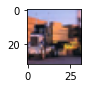

In [9]:
#The imshow can then display the actual image abd the size is limited to (1,1) since the defualt size is 32*32.
#plt.figure()
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
#The above steps are put in to function so that it can be called for a set of images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

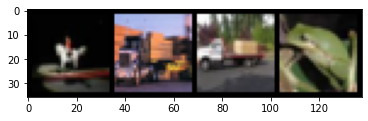

horse truck truck frog


In [11]:
#A grid is made out using the torchvision.utils.make_grid and imshow is applied on top of it to display the grid of 4 images in the batch
#https://pytorch.org/docs/stable/torchvision/utils.html
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## 1 Layer CNN

In [12]:
#CNN defined with 1 layer
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        #2D convolution since the kernel deals in 2D,eventhough the image is of 4 dimensions (batch_size(4),no:Of channels(3),image resolution(32*32))
        #the Conv2d had the parameters (no of inp channels(3),no of output channles/kernels(16),size of kernel 3*3,stride(2) and padding(1))
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))

    #Create the forward function as applying the convolution operation and returning the output    
    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
#Initialise the 1 layer CNN
net = FirstCNN()

In [14]:
#Apply the CNN to first set of images and the output will be 4 sets corresponding to 4 images, with each batch having 16 output layers, with each layer of size 16*16. 
#The size got reduced from 32*32 to 16*16 as the stride was 2 and padding was (1,1).
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [15]:
#On displaying the parameters of the model we have
#torch.Size([16, 3, 3, 3]) - 16 output layers, 3 input channels,3*3 kernel - Total - 16*3*3 -151 weight parameters
#torch.Size([16])  - Biases
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
#printing the shape of 1st output layer(out of 16) from 1st batch,1st image
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


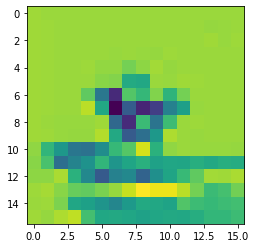

In [17]:
#Display the output from 1st layer(out of 16) from 1st batch,1st image from the 1 layer CNN
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## 2 Layer CNN

In [18]:
#Define a 2 layer CNN
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            #Stacking 2 convolutional layers
            #1st layer - 3 input channels,8 output layers,3*3 kernal
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30) #output is 30*30 as there is no padding
            #2nd layer - 8 input layers,16 output layers,3*3 kernal
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28) #output is 28*28 as there is no padding
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [19]:
#Initialise the 2 layer CNN and apply the same to the 1st batch of 4 images
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

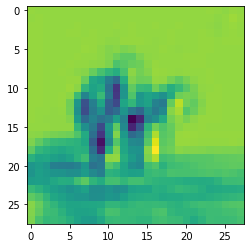

In [20]:
#Display the output from 1st layer(out of 16) from 1st batch,1st image from the 2 layer CNN
plt.imshow(out[0, 0, :, :].detach().numpy())

## 3 Layer CNN

In [21]:
#Define a 3 layer CNN
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            #apply 4 layers with 2 convolution followed by AvgPool2d. The AvgPool2d functtion is taking 2*2 filter with stride of 2 there by cutting the size in to half
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
#Initialise the 3 layer CNN and apply the same to the 1st batch of 4 images
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

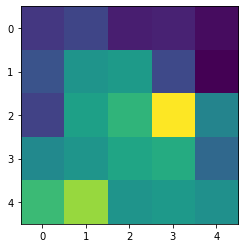

In [23]:
#Display the output from 1st layer(out of 16) from 1st batch,1st image from the 3 layer CNN
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [24]:
#Define the LeNet CNN architecture
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        #CNN part of the LeNet model
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        #Fully connected part of the LeNet Model
        #The output from CNN layers should be flattened in the forward operation before the fully connected layer operations are performed (N, 16, 5, 5)-->(N, 400)
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    #Define the forward pass for CNN
    def forward(self, x):
        print(x.shape)
        #Apply the cnn_model, the CNN part of LeNET
        x = self.cnn_model(x)
        print(x.shape)
        #The 16*5*5 output from CNN layer is flattened before applying the FC layer
        #apply x.view(x.size(0), -1) which will retain the same dimension as N follwed by a collapse of all other indicated by -1 which is 16*5*5=400    
        x = x.view(x.size(0), -1)
        print(x.shape)
        #The soft max function is snot applied at the end as the maximum value out of the 10 classes will be the maximum in sigmoid as well.
        #However softmax is important in back propagation as the sigmoid function is part of the cross entropy loss function.
        x = self.fc_model(x)
        print(x.shape)
        return x

In [25]:
#Initialise a LeNet CNN and Apply it on 4 images
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
#The output which is actually 4 lists with the probability scores for 4 images across 10 labels.
#The label that has the maximum value will be the pediction assosiated with each of the  4 images. 
print(out)

tensor([[-0.0251, -0.0537,  0.0267, -0.0648,  0.1038, -0.1212,  0.0427, -0.0782,
         -0.0060, -0.0023],
        [-0.0286, -0.0521, -0.0184, -0.1062,  0.0640, -0.1124,  0.0376, -0.0360,
         -0.0115, -0.0073],
        [-0.0091, -0.0573, -0.0079, -0.0663,  0.0650, -0.1205,  0.0322, -0.0508,
         -0.0007,  0.0018],
        [-0.0012, -0.0605,  0.0040, -0.0636,  0.0806, -0.1411,  0.0329, -0.0683,
          0.0104,  0.0006]], grad_fn=<AddmmBackward>)


In [27]:
# Class List = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#Get the max values for each of the 4 classes and rerieve the corresponding classes.
#All the images are predicted as 'car' with index 1, as this is only 1 iteration and to be more effective it has to go through the 'training process' below.
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([4, 4, 4, 4])


## Training LeNet

In [28]:
#Define LeNet CNN
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [29]:
#The batch size is increased to 128 from 2. The bathc sise should be selected as power of 2 as GPU's work best on batch sizes with powere of 2.
#Get the CIFAR10 daset for training and testing.
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
#Evaluation function to check the % of predictions that was correct for training and test datasets.
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [31]:
#Initialise a LeNet CNN
net = LeNet()

In [32]:
#Define the loss and optimisation model.
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/50, Test acc: 38.02, Train acc: 38.44
Epoch: 1/50, Test acc: 42.07, Train acc: 42.25
Epoch: 2/50, Test acc: 46.28, Train acc: 47.16
Epoch: 3/50, Test acc: 47.92, Train acc: 49.46
Epoch: 4/50, Test acc: 50.78, Train acc: 53.02
Epoch: 5/50, Test acc: 52.01, Train acc: 54.19
Epoch: 6/50, Test acc: 52.84, Train acc: 56.21
Epoch: 7/50, Test acc: 53.34, Train acc: 57.46
Epoch: 8/50, Test acc: 53.85, Train acc: 58.75
Epoch: 9/50, Test acc: 54.66, Train acc: 59.91
Epoch: 10/50, Test acc: 54.67, Train acc: 61.04
Epoch: 11/50, Test acc: 54.49, Train acc: 61.39
Epoch: 12/50, Test acc: 55.35, Train acc: 62.07
Epoch: 13/50, Test acc: 55.50, Train acc: 63.77
Epoch: 14/50, Test acc: 55.49, Train acc: 64.64
Epoch: 15/50, Test acc: 55.79, Train acc: 65.10
Epoch: 16/50, Test acc: 56.19, Train acc: 65.93
Epoch: 17/50, Test acc: 55.81, Train acc: 66.64
Epoch: 18/50, Test acc: 55.17, Train acc: 66.61
Epoch: 19/50, Test acc: 55.81, Train acc: 68.08
Epoch: 20/50, Test acc: 55.45, Train acc: 67.85
Ep

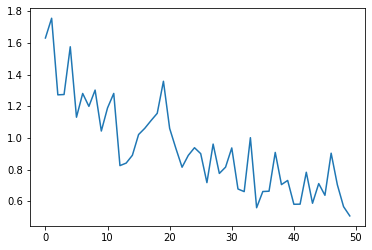

CPU times: user 19min 58s, sys: 9.79 s, total: 20min 8s
Wall time: 20min 5s


In [33]:
#Run the traning process for all the images 'max_epochs' # of times.
#Store the loss value for each iteration which ideally should decrease for every iteration.
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 50

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

#display the loss trend across the iterations.
plt.plot(loss_epoch_arr)
plt.show()

## Training LeNet in GPU

In [34]:
#Run the same process as above in GPU for faster results
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [36]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [37]:
%%time
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/50
Epoch: 1/50
Epoch: 2/50
Epoch: 3/50
Epoch: 4/50
Epoch: 5/50
Epoch: 6/50
Epoch: 7/50
Epoch: 8/50
Epoch: 9/50
Epoch: 10/50
Epoch: 11/50
Epoch: 12/50
Epoch: 13/50
Epoch: 14/50
Epoch: 15/50
Epoch: 16/50
Epoch: 17/50
Epoch: 18/50
Epoch: 19/50
Epoch: 20/50
Epoch: 21/50
Epoch: 22/50
Epoch: 23/50
Epoch: 24/50
Epoch: 25/50
Epoch: 26/50
Epoch: 27/50
Epoch: 28/50
Epoch: 29/50
Epoch: 30/50
Epoch: 31/50
Epoch: 32/50
Epoch: 33/50
Epoch: 34/50
Epoch: 35/50
Epoch: 36/50
Epoch: 37/50
Epoch: 38/50
Epoch: 39/50
Epoch: 40/50
Epoch: 41/50
Epoch: 42/50
Epoch: 43/50
Epoch: 44/50
Epoch: 45/50
Epoch: 46/50
Epoch: 47/50
Epoch: 48/50
Epoch: 49/50
CPU times: user 4min 7s, sys: 1.62 s, total: 4min 8s
Wall time: 4min 8s


In [38]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 54.59, Train acc: 83.54


## Basic Visualisation of LeNet at different levels

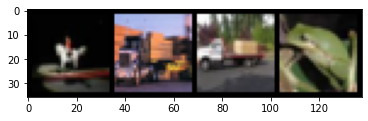

In [39]:
imshow(torchvision.utils.make_grid(images))

In [40]:
#Transfer the CNN model from GPU to CPU for visualisation purposes
net = net.to('cpu')

In [41]:
#apply the GPU model on the grid of 4 images
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [42]:
#net.cnn_model gets all the cnn layers applied and net.cnn_model[0] will be the o/p of first layer
#out = net.cnn_model[0](images) #4 images, 6 output layers with each layer of 28*28 size
#out.shape

torch.Size([4, 6, 28, 28])

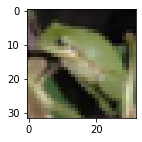

In [43]:
#Pick one image from the grid, the last one
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

In [44]:
#net.cnn_model gets all the cnn layers applied and net.cnn_model[0] will be the o/p of first layer
out = net.cnn_model[0](images) #4 images, 6 output layers with each layer of 28*28 size
out.shape

torch.Size([4, 6, 28, 28])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


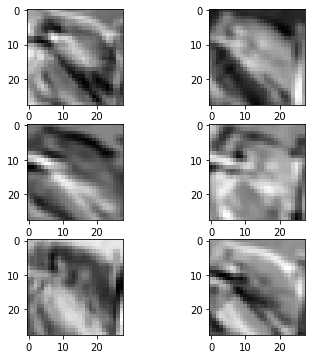

In [45]:
#For the picked image display the output from 6 o/p layers of 1st CNN layer
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

In [46]:
#net.cnn_model will be the o/p of last CNN layer that has 16 o/p layers each of size 5*5
out = net.cnn_model(images)
print(out.shape)
#print(out)

torch.Size([4, 16, 5, 5])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


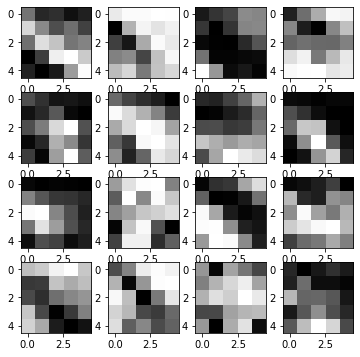

In [47]:
#print the output of 16 seperate layers from the last CNN layer
plt.figure(figsize = (6,6))
plt.subplot(441)
for i in range(16):
    ax1 = plt.subplot(4, 4, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.